<a href="https://colab.research.google.com/github/surajk150741/Data_Science_Projects/blob/main/Time%20Series%20Forecasting/Keras_and_RNN(LSTM)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lecture, we're going to discover how to use Keris and recurrent neural networks(RNN) to Forecast a time series sequence into the future for however many periods we want.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Alcohol_Sales.csv to Alcohol_Sales (1).csv


In [ ]:
df = pd.read_csv("Alcohol_Sales.csv",index_col="DATE",parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


Since the name of the only column is weird we are gonna change the name of the column

In [ ]:
df.columns = ['Sales']         # just used 'column' because there is only one column

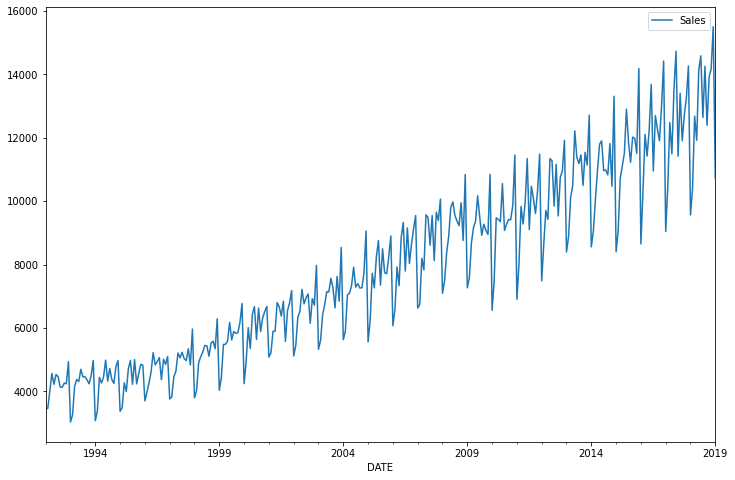

In [ ]:
df.plot(figsize=(12,8))

We can see that there is seasonality and some trend clearly

In [ ]:
import pandas.util.testing as tm

In [ ]:
#lets decompose

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results = seasonal_decompose(df['Sales'])

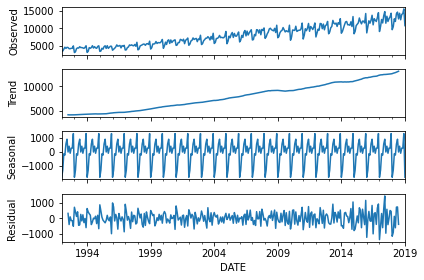

In [ ]:
results.plot();

We can also plot out the seperate components e.g.

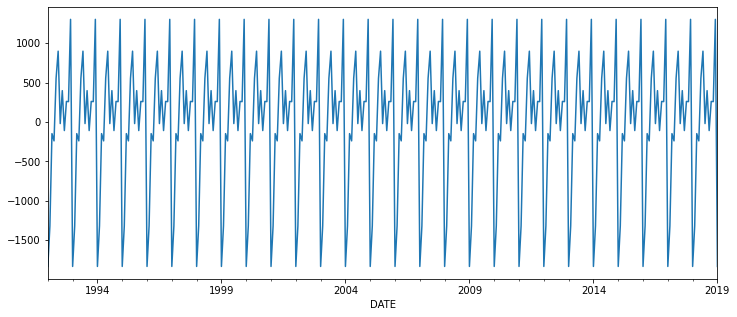

In [ ]:
results.seasonal.plot(figsize=(12,5))

In [ ]:
# We can get the series of each component too

results.seasonal

DATE
1992-01-01   -1836.088354
1992-02-01   -1321.328738
1992-03-01    -148.299892
1992-04-01    -240.372008
1992-05-01     554.966133
                 ...     
2018-09-01    -109.224572
2018-10-01     260.730557
2018-11-01     258.666454
2018-12-01    1303.892416
2019-01-01   -1836.088354
Freq: MS, Name: Sales, Length: 325, dtype: float64

Let's do the train-test split now

In [ ]:
len(df)

325

Since we have monthly data, lets forecast for a year in the future

In [ ]:
325-12

313

In [ ]:
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


So my test data is the last year

NOW WE ARE GONNA GET INTO THINGS THAT ARE SPECIFIC TO KERAS

When we are running the neural network, we are gonna have to scale the data or normalize the data

Lots of ways in which we can scale the data, one is to divide by the maximum value 

Lets see how it's done

In [ ]:
# Lets say I have some series of information and in fact I am just going to dp this as a normal numpy array 
ser = np.array([23,56,2,13,14])

In [ ]:
ser.max()        # fit

56

In [ ]:
# If I want to normalize the data, essential scale between the numbers stays the same
#    But the overall range happens to fall between 0 and 1 

ser/ser.max()      #transform         # Now each value is in between 0 and 1 

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

as we know with neural networks, since we are calculating biases and weights, if we have data that's too skewed off, maybe your smallest point is kind of way lower than your highest point.


E.g. in our alcohol data value of sales ranges from 4000 to 14000 which is very large when we are talking about neural networks, so we will scale it. 

And we can automatically scale our data using a Sckit learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Here MinMaxScaler is automated version of what we did above with numpy array to normalize it. 

In [ ]:
# We create a scaler object

scaler = MinMaxScaler()

In [ ]:
# And scaler object can either fit or transform

scaler.fit(train)             # It finds the max value in train data

MinMaxScaler(copy=True, feature_range=(0, 1))

If we were to fit to the entire dataset, we're cheating a little bit by assuming future knowledge about the test set.

In [ ]:
# Now, we're actually going to transform the training data and the testing data.

scaled_train = scaler.transform(train)      # It simply just divide by the maximum values 
scaled_test = scaler.transform(test)

Now, its time to use these as time series generator object.

Generator object which is a very convenient tool that keras provides us that takes in sequence of data points gathered at equal intervals, and then it will kind of return batches of them for us.

In [ ]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

Now we are going to figure out, how we're actually going to feed batches of this Time series along the label.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

Recall that for our scaler object, we only fit towards the training data

which means if the test data had an item or label that was larger than the max value of training data, it will actually fit to be above of one

E.g. we have value in our test data, that is bigger than max value of test data as shown below

In [ ]:
scaled_test.max()

1.0661595008120353

But its alright, we are concerned about the scale here. 

Now lets define the actual generator object, which is gonna read in time sequence and spit out batches 

In [ ]:
n_input = 2
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)   ## essentially the source of the data and the source of the targets, 
                                                                                    ##     the way we're using it here should come from the same data source.



And this 'TimeseriesGenerator' class takes in a sequence of data-points gathered at EQUAL INTERVALS 

and we have time series parameters like length of history, stride, etc. 

In [ ]:
len(scaled_train)

313

In [ ]:
len(generator)       # This is just len(scaled_train) - n_input

311

Lets see what does generator object kinda produces 

In [ ]:
generator[0]

(array([[[0.03658432],
         [0.03649885]]]), array([[0.08299855]]))

In [ ]:
# Above looks weird, so lets do tuple unpacking
x,y = generator[0]

In [ ]:
x            #  these are the first and second entry of our scaled_train data

array([[[0.03658432],
        [0.03649885]]])

In [ ]:
y            # this is the third entry of our scaled_train data

array([[0.08299855]])

So, It(generator) went ahead and said, OK, that will be the length of the training data and then we'll predict that very next point

But how should we decide the number of inputs(n_input) here?

If you're dealing with a data set that shows some clear seasonality over the course of a year, then you should probably feed in at least 12 data points in order for the recurrent neural network to be able to pick up on that seasonality.

So, thats what we want, We want to feed in a sequence and then predict one y step into the future 

And then if you want to predict more than one Y step into the future, you just keep repeating that process and eventually you'll be using your forecasted values to forecast even further into the future.

Now we're actually going to create the model and then fit it to that generator object.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense         # for final output layer
from keras.layers import LSTM

In [ ]:
n_input = 12
n_features = 1               # n_fearute generally decides the number of columns, which is 1 in our case

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)   ## essentially the source of the data and the source of the targets, 
                                                                                    ##     the way we're using it here should come from the same data source.

In [ ]:
model = Sequential()

# Then we gonna add in a LSTM layer and then we are gonna add in quite a few neurons in this LSTM layer

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))       # Now, number of neurons can be larger or smaller

# Now, we have to aggregate all the neurons to a single prediction

model.add(Dense(1))

# Lets compile

model.compile(optimizer='adam',loss='mse')



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


Now, lets fit it to a training generator 

In [ ]:
model.fit_generator(train_generator,epochs=25)    #One epoch is just a single entire run through all of your training data.

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


301/301 [==============================] - 4s 7ms/step - loss: 0.0362
Epoch 2/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0110
Epoch 3/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0092
Epoch 4/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 5/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0083
Epoch 6/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0055
Epoch 7/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0047
Epoch 8/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0036
Epoch 9/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0025
Epoch 10/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 11/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 12/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0027
Epoch 13/25
301/301 [===============

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

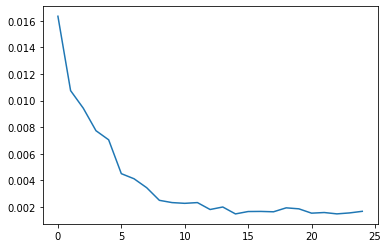

In [ ]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

OK, so now how do we actually evaluate this on the test data?

So what we need to do is we first need to create an evaluation batch.

Recall that our network basically trains one timestep ahead.

So right now our network will see 12 history steps and then predict step 13.

So what we need to do is to start off, we need the last 12 points of the training data in order to predict point one of the test data


In [ ]:
# 12 history steps -----> step 13
# Last 12 points train ----> pt 1 of test data

The important thing to note is our network can only run on scaled data because it was trained on scale data

In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch            # Last 12 points of the training set

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.69604456]], dtype=float32)

So, above means that given these 12 points above it predicts that 0.66472805
should be the first point of the test data set.



But first, we want to do is we want to be able to not just predict the first point in the test set, but the entire test set.

# Forecast using RNN Model

In [ ]:
# holding my predictions
test_predictions = []     #empty place holder

# Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]        # More genralised version of first_eval_batch
current_batch = first_eval_batch.reshape((1,n_input,n_features))

In [ ]:
my_first_pred = model.predict(current_batch)[0]

In [ ]:
my_first_pred

array([0.69604456], dtype=float32)

In [ ]:
# holding my predictions
test_predictions = []     #empty place holder

# Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]        # More genralised version of first_eval_batch
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# Now, how far into the future will I forecast?
#    For now, the answer is len(test), but we can choose our own length and which also includes the concern about predicting for true unknown future
for i in range(len(test)):

  # one time step ahead of historical 12 points
  current_pred = model.predict(current_batch)[0]

  # Store that prediction
  test_predictions.append(current_pred)
  
  # Update the current batch to include prediction  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

# Understanding above block
1. We got empty list that's going to hold my predictions.
2. Grab first evaluation batch because :
Recall that our model takes in 12 historical points and then output a 13th point which means if I want to try to predict that very first point in the test set I am gonna need the 12 historical values right behind it, which are going to be the last 12 values of our trainng set
3. reshape first_eval_batch to the format the RNN wants, which is the same format as the time series generator outputs. In'reshape((1,n_input,n_features))'
first input is Batch dimension
4. I'm going to forecast the length of the test set into the future for 12 points. So:
(1). Well, the first thing is I grab my current prediction, which is one time step ahead of historical 12 points. The zero here is for formatting.
(2). Store that prediction

- I want to do now is I want to forecast one time step ahead further than my_first_prediction. But recall, I need 12 historical values.

- So, now, I am going to drop the first value from the current batch and then add on my prediction to the very end

- And thats where 'current_batch[:,1:,:]' comes into play, here the shape of 'current_batch' is (1, 12, 1) and [:,1:,:] means as follows [everything in the dimension:from one to the end:everything in the dimension] What it does is that it removes our first data(that we wanted to remove), So the new shape would be (1, 11, 1)

- And then "np.append(current_batch[:,1:,:],[[current_pred]],axis=1)" add our first prediction to the current_batch.

- Here axis=1 tells to add it in the middle of (1,12,1)

5. And I keep repeating this process.
6. Eventually the recurrent neural network is going to, if you go long enough, do forecasts on forecasts. And it can get very noisy


In [ ]:
test_predictions

[array([0.69604456], dtype=float32),
 array([0.81496537], dtype=float32),
 array([0.7699846], dtype=float32),
 array([0.91856694], dtype=float32),
 array([0.99231696], dtype=float32),
 array([0.75788975], dtype=float32),
 array([0.89827347], dtype=float32),
 array([0.7724556], dtype=float32),
 array([0.84340525], dtype=float32),
 array([0.8856157], dtype=float32),
 array([0.9584445], dtype=float32),
 array([0.60373783], dtype=float32)]

Now we want to invert that scaling data

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[11174.02535713],
       [12565.27983224],
       [12039.04986966],
       [13777.31465697],
       [14640.11613011],
       [11897.5521574 ],
       [13539.90130234],
       [12067.95774949],
       [12897.99798155],
       [13391.81814969],
       [14243.84192622],
       [10094.12888622]])

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11174.025357
2018-03-01,12683,12565.279832
2018-04-01,11919,12039.049870
2018-05-01,14138,13777.314657
2018-06-01,14583,14640.116130
2018-07-01,12640,11897.552157
2018-08-01,14257,13539.901302
2018-09-01,12396,12067.957749
2018-10-01,13914,12897.997982


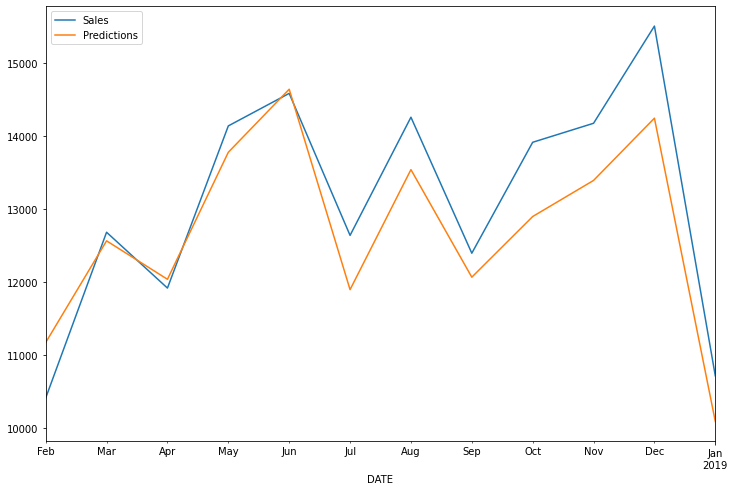

In [ ]:
test.plot(figsize = (12,8))

- Keep in mind, there is a little bit of randomness when you're training your recurrent neural network 

- And you may not get the exact values I get here, but more or less, there should be some sort of lining up to these peaks and valleys.

In [ ]:
model.save('mycoolmodel.h5')

In [ ]:
pwd

'/content'